In [3]:
import sys
sys.path.insert(0,'/home/caldaz/module/pyGSM')
import numpy as np
from de_gsm import GSM
from pytc import PyTC
from pes import PES
from eigenvector_follow import eigenvector_follow
from psiw import *
from rhf_lot import RHF_LOT
from nifty import pvec1d,pmat2d,click,printcool
from molecule import Molecule
import manage_xyz
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [4]:
##### => Job Data <= #####
charge=0
basis='6-31gs'
filepath1 = 'data/butadiene_ethene.xyz'
filepath2 = 'data/cyclohexene.xyz'

In [5]:
#### => PSIW Obj <= ######
printcool("Build resources")
resources = ls.ResourceList.build()
printcool('{}'.format(resources))

molecule1 = ls.Molecule.from_xyz_file(filepath1)
molecule2 = ls.Molecule.from_xyz_file(filepath2)

geom1 = geometry.Geometry.build(
    resources=resources,
    molecule=molecule1,
    basisname=basis,
    )
geom2 = geometry.Geometry.build(
    resources=resources,
    molecule=molecule2,
    basisname=basis,
    )

printcool('{}'.format(geom1))
printcool('{}'.format(geom2))

ref1 = RHF(RHF.default_options().set_values({
    'geometry' : geom1,
    'dft_functional' : 'B3LYP',
    'dft_grid_name' : 'SG0',
    }))
ref2 = RHF(RHF.default_options().set_values({
    'geometry' : geom2,
    'dft_functional' : 'B3LYP',
    'dft_grid_name' : 'SG0',
    }))

psiw1 = RHF_LOT.from_options(rhf=ref1)
psiw2 = RHF_LOT.from_options(rhf=ref2)

#========================================================#
#|                   Build resources                    |#
#========================================================#
#==============================================================#
#|                       ResourceList:                        |#
#|                       CPU threads:   1                     |#
#|                       GPU contexts:  1                     |#
#|                     GPU context details:                   |#
#|    N  ID                 Name  CC  CPU Buffer  GPU Buffer  |#
#|    0   0    GeForce GTX TITAN 3.5        1024        1024  |#
#|                                                            |#
#==============================================================#
#========================================================#
#|                      Geometry:                       |#
#|                      QMMM = False                    |#
#|                      -D3  = False                    |#
#|

In [6]:
####### =>  Build the pyGSM objects <= #########
# level of theory
printcool("Build the pyGSM Level of Theory object (LOT)")
lot1=PyTC.from_options(states=[(1,0)],psiw=psiw1,fnm=filepath1)
lot2=PyTC.from_options(states=[(1,0)],psiw=psiw2,fnm=filepath2)

# => Create PES objects <= #
printcool("Building the PES objects")
pes1 = PES.from_options(lot=lot1,ad_idx=0,multiplicity=1)
pes2 = PES.from_options(lot=lot2,ad_idx=0,multiplicity=1)

# => Molecule <= #
printcool("Build the pyGSM Molecule object \n with Translation and Rotation Internal Coordinates (TRIC)")
reactant = Molecule.from_options(fnm=filepath1,PES=pes1,coordinate_type="TRIC")
product = Molecule.from_options(fnm=filepath2,PES=pes2,coordinate_type="TRIC")

optimizer=eigenvector_follow.from_options(print_level=1)  #default parameters fine here/opt_type will get set by GSM

#========================================================#
#|     Build the pyGSM Level of Theory object (LOT)     |#
#========================================================#
 initializing LOT from file
 initializing LOT from file
#========================================================#
#|               Building the PES objects               |#
#========================================================#
#================================================================#
#|               Build the pyGSM Molecule object                |#
#|   with Translation and Rotation Internal Coordinates (TRIC)  |#
#================================================================#
 reading cartesian coordinates from file
 making primitives from options!
39 10
21 6
time to form B-matrix 0.014
time to mat-mult B 0.000
Build G: 0.014 Eig: 0.001
 making primitive Hessian
 forming Hessian in basis
 reading cartesian coordinates from file
 making primitives from options!
95 16
time to form B-matrix 0.02

In [7]:
printcool("Primitives before union")
print(reactant.coord_obj.Prims.Internals)

#========================================================#
#|               Primitives before union                |#
#========================================================#
[Distance 1-2, Distance 1-6, Distance 1-7, Distance 2-3, Distance 2-5, Distance 3-4, Distance 3-10, Distance 4-9, Distance 4-8, Angle 2-1-7, Angle 6-1-7, Angle 1-2-5, Angle 3-2-5, Angle 2-3-10, Angle 4-3-10, Angle 3-4-9, Angle 8-4-9, Out-of-Plane 1-2-6-7, Out-of-Plane 2-1-3-5, Out-of-Plane 3-2-4-10, Out-of-Plane 4-3-8-9, Dihedral 6-1-2-3, Dihedral 6-1-2-5, Dihedral 7-1-2-3, Dihedral 7-1-2-5, Dihedral 1-2-3-4, Dihedral 1-2-3-10, Dihedral 5-2-3-4, Dihedral 5-2-3-10, Dihedral 2-3-4-9, Dihedral 2-3-4-8, Dihedral 10-3-4-9, Dihedral 10-3-4-8, Translation-X 1-10, Translation-Y 1-10, Translation-Z 1-10, Rotation-A 1-10, Rotation-B 1-10, Rotation-C 1-10, Distance 11-12, Distance 11-13, Distance 11-14, Distance 12-15, Distance 12-16, Angle 12-11-14, Angle 13-11-14, Angle 11-12-16, Angle 15-12-16, Out-of-Plane 11-12-13-14,

In [8]:
printcool("Primitives before union")
print(product.coord_obj.Prims.Internals)

#========================================================#
#|               Primitives before union                |#
#========================================================#
[Distance 1-2, Distance 1-11, Distance 1-6, Distance 1-7, Distance 2-3, Distance 2-5, Distance 3-4, Distance 3-10, Distance 4-9, Distance 4-12, Distance 4-8, Distance 11-12, Distance 11-13, Distance 11-14, Distance 12-15, Distance 12-16, Angle 2-1-11, Angle 2-1-6, Angle 2-1-7, Angle 6-1-11, Angle 6-1-7, Angle 7-1-11, Angle 1-2-5, Angle 3-2-5, Angle 2-3-10, Angle 4-3-10, Angle 9-4-12, Angle 3-4-9, Angle 3-4-12, Angle 3-4-8, Angle 8-4-9, Angle 8-4-12, Angle 1-11-12, Angle 1-11-13, Angle 1-11-14, Angle 12-11-13, Angle 12-11-14, Angle 13-11-14, Angle 11-12-15, Angle 11-12-16, Angle 4-12-11, Angle 4-12-15, Angle 4-12-16, Angle 15-12-16, Out-of-Plane 2-1-3-5, Out-of-Plane 3-2-4-10, Dihedral 11-1-2-3, Dihedral 11-1-2-5, Dihedral 6-1-2-3, Dihedral 6-1-2-5, Dihedral 7-1-2-3, Dihedral 7-1-2-5, Dihedral 2-1-11-12, Dihedral

#========================================================#
#|                Topology before union                 |#
#========================================================#


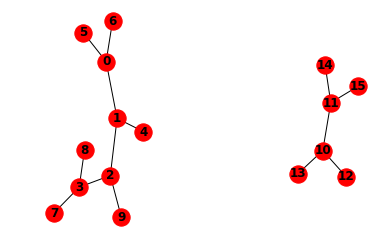

In [9]:
printcool("Topology before union")
plt.plot()
nx.draw(reactant.coord_obj.Prims.topology,with_labels=True,font_weight='bold') 
plt.show()

#========================================================#
#|                Topology before union                 |#
#========================================================#


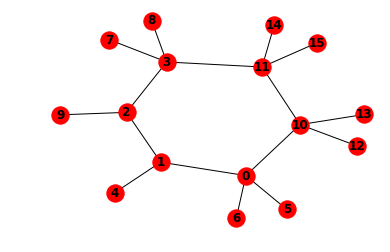

In [10]:
printcool("Topology before union")
plt.plot()
nx.draw(product.coord_obj.Prims.topology,with_labels=True,font_weight='bold') 
plt.show()

#========================================================#
#|       Wilson B-Matrix (dq_i/dx_j) before union       |#
#========================================================#


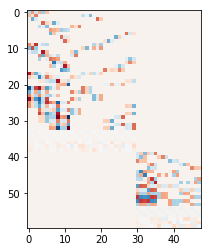

In [11]:
printcool("Wilson B-Matrix (dq_i/dx_j) before union")
Bmatp = reactant.coord_obj.Prims.wilsonB(reactant.xyz)
plt.imshow(Bmatp, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|            Coordinate Basis before union             |#
#========================================================#


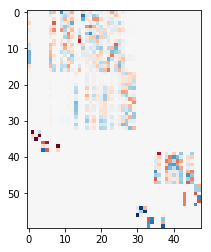

In [12]:
printcool("Coordinate Basis before union")
plt.imshow(reactant.coord_basis, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

In [13]:
gsm = GSM.from_options(reactant=reactant,product=product,nnodes=9,optimizer=optimizer,print_level=1)


        __        __   _                            _        
        \ \      / /__| | ___ ___  _ __ ___   ___  | |_ ___  
         \ \ /\ / / _ \ |/ __/ _ \| '_ ` _ \ / _ \ | __/ _ \ 
          \ V  V /  __/ | (_| (_) | | | | | |  __/ | || (_) |
           \_/\_/ \___|_|\___\___/|_| |_| |_|\___|  \__\___/ 
                                        ____ ____  __  __ 
                           _ __  _   _ / ___/ ___||  \/  |
                          | '_ \| | | | |  _\___ \| |\/| |
                          | |_) | |_| | |_| |___) | |  | |
                          | .__/ \__, |\____|____/|_|  |_|
                          |_|    |___/                    
#==========================================================================#
#| If this code has benefited your research, please support us by citing: |#
#|                                                                        |# 
#| Aldaz, C.; Kammeraad J. A.; Zimmerman P. M. "Discovery of conical      |#
#| intersection mediated p

#========================================================#
#|                 Topology after union                 |#
#========================================================#


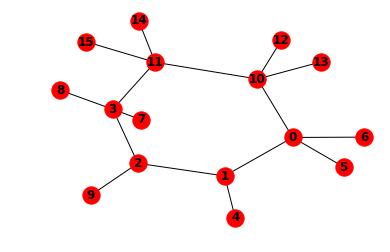

In [14]:
printcool("Topology after union")
plt.plot()
nx.draw(gsm.nodes[0].coord_obj.Prims.topology,with_labels=True,font_weight='bold') 
plt.show()

#========================================================#
#|             Wilson B-Matrix (dq_i/dx_j)              |#
#========================================================#


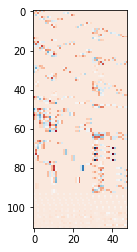

In [15]:
printcool("Wilson B-Matrix (dq_i/dx_j)")
Bmatp = gsm.nodes[0].coord_obj.Prims.wilsonB(reactant.xyz)
plt.imshow(Bmatp, cmap=plt.cm.get_cmap('RdBu'))
plt.show()

#========================================================#
#|                   Coordinate Basis                   |#
#========================================================#


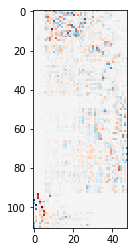

In [16]:
printcool("Coordinate Basis")
plt.imshow(gsm.nodes[0].coord_basis, cmap=plt.cm.get_cmap('RdBu'))
plt.show()